# Atividade 3 - Naive Bayes e Regressão Logistica

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

## Naive bayes gaussiano

In [2]:
class NaiveBayesGaussiano():
    
    def __init__(self):
        self._estimator_type = "classifier"
        self.c_mean = {}
        self.c_std = {}
        self.y_prob = {}
        pass
    
    def fit(self, X, y):
        self.y_values, y_counts =  np.unique(y, return_counts=True)
        for y_value, y_count in zip(self.y_values, y_counts):
            self.y_prob[y_value] = (y_count / y_counts.sum())
            indices = np.array([])
            for i in range(0, y.shape[0]):
                if y[i] == y_value:
                    indices = np.append(indices, i)
                    
            self.c_mean[y_value] = np.array([])
            self.c_std[y_value] = np.array([])
            for i in range(0, X.shape[1]):
                x = np.array([X[int(index), i] for index in indices])
                self.c_mean[y_value] = np.append(self.c_mean[y_value], x.mean())
                std = np.array([(value - x) ** 2 for value in x])
                self.c_std[y_value] = np.append(self.c_std[y_value], np.sqrt(std.mean()))
                
        return self
                
            
        
    def predict(self, X):
        predict = np.array([])
        for x in X:
            pred = []
            for label in self.y_values:
                probability = 1
                for i in range(0, x.shape[0]):
                    aux = 1 / (np.sqrt(2*np.pi) * self.c_std[label][i])
                    prob_x_c = aux * np.exp(-((np.power(x[i] - self.c_mean[label][i], 2))/(2 * np.power(self.c_std[label][i], 2))))
                    probability *= prob_x_c
                pred.append((label, probability * self.y_prob[label]))

            result = pred[0]
            for p in pred:
                if p[1] > result[1]:
                    result = p
            
            predict = np.append(predict, result[0])
        return predict
    
    

## Discriminante quadratico gaussiano

In [3]:
class DiscriminanteQuadraticoGaussiano():
    def __init__(self):
        self._estimator_type = "classifier"
        self.c_mean = {}
        self.c_cov = {}
        self.y_prob = {}
        pass
    
    def fit(self, X, y):
        self.y_values, y_counts =  np.unique(y, return_counts=True)
        for y_value, y_count in zip(self.y_values, y_counts):
            self.y_prob[y_value] = (y_count / y_counts.sum())
            indices = np.array([])
            for i in range(0, y.shape[0]):
                if y[i] == y_value:
                    indices = np.append(indices, i)
                    
            x = np.array([X[int(index), :] for index in indices])
            self.c_mean[y_value] = np.array([])
            self.c_cov[y_value] = np.cov(X, rowvar=False)
            for i in range(0, X.shape[1]):
                self.c_mean[y_value] = np.append(self.c_mean[y_value], x[:, i].mean())
                
        return self
                
            
        
    def predict(self, X):
        predict = np.array([])
        for x in X:
            pred = []
            for label in self.y_values:
                for i in range(0, x.shape[0]):
                    aux = 1 / (np.power(2*np.pi, X.shape[1] / 2) * np.sqrt(np.linalg.det(self.c_cov[label])))
                    prob_x_c = aux * np.exp(-(1.0/2) * (x - self.c_mean[label]).T @ np.linalg.inv(self.c_cov[label]) @ (x - self.c_mean[label]))
                pred.append((label, prob_x_c * self.y_prob[label]))

            result = pred[0]
            for p in pred:
                if p[1] > result[1]:
                    result = p
            
            predict = np.append(predict, result[0])
        return predict

## Matriz de confusão

In [4]:
def plot_confusion_matrix_(X, y, clf):
    disp = plot_confusion_matrix(clf, X, y)
    disp.ax_.set_title("Matriz de confusão")
    plt.show()

## Avaliação de dados preditos

In [5]:
def avaliate(y_real, y_pred):
    count = 0
    for r, p in zip(y_real, y_pred):
        if r == p:
            count += 1
    return (count / y_real.shape[0])

## Carregando dados

In [6]:
data = np.loadtxt("./iris.data", delimiter=",")
np.random.shuffle(data)
X = data[:, 0:4]
y = data[:, -1]

## Divisão de dados em treino e teste

In [7]:
n = int(X.shape[0] * 0.6)
X_train = X[:n, :]
X_test = X[n:, :]
y_train = y[:n]
y_test = y[n:]

## Aplicando Naive bayes gausssiano

In [8]:
GaussianNB = NaiveBayesGaussiano()
GaussianNB.fit(X_train, y_train)
LDA_pred = GaussianNB.predict(X_test)
print("avaliação: ", avaliate(y_test, LDA_pred))

avaliação:  0.9166666666666666


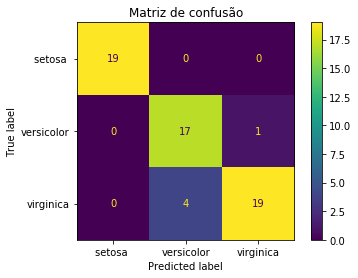

In [9]:
GaussianNB.classes_ =  ["setosa ","versicolor", "virginica"]
plot_confusion_matrix_(X_test, y_test, GaussianNB)

## Aplicando discriminante quadratico gaussiano

In [10]:
QDA = DiscriminanteQuadraticoGaussiano()
QDA.fit(X_train, y_train)
QDA_pred = QDA.predict(X_test)
print("avaliação: ", avaliate(y_test, QDA_pred))

avaliação:  0.7833333333333333


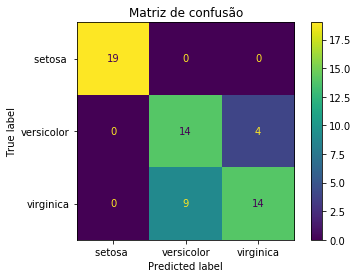

In [11]:
QDA.classes_ =  ["setosa ","versicolor", "virginica"]
plot_confusion_matrix_(X_test, y_test, QDA)

## Aplicando regressão logística

In [13]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
print("avaliação: ", avaliate(y_test, LR_pred))

avaliação:  0.9166666666666666


C:\Users\robso\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
